In [1]:
#Models on original data without fearture selection
import numpy as npy
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sbn
%matplotlib inline

train_data = pds.read_csv('trainData.csv')
test_data = pds.read_csv('testData.csv')
train_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,57.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,133.0,78.0,29.0,72.0,92.0,0.0
1,1.0,64.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0,121.0,70.0,23.6,68.0,75.0,0.0
2,0.0,42.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,152.0,122.0,76.0,21.3,85.0,78.0,0.0
3,1.0,60.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,145.0,81.0,29.4,75.0,73.0,0.0
4,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,126.5,85.0,19.0,80.0,75.0,0.0


In [2]:
train_input = train_data.iloc[:,0:15]
train_label = train_data.iloc[:,-1]
test_input = test_data.iloc[:,0:15]
test_label = test_data.iloc[:,-1]

In [3]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(train_input, train_label)
logistic_predicts = logistic_model.predict(test_input)

In [4]:
accuracy = logistic_model.score(test_input, test_label)
accuracyt = logistic_model.score(train_input, train_label)
print('Logistic Regression \nTest accuracy : ', accuracy, '\nTrain accuracy : ', accuracyt)

Logistic Regression 
Test accuracy :  0.8584905660377359 
Train accuracy :  0.8528891509433962


In [5]:
from sklearn.neighbors import KNeighborsClassifier

k1_model = KNeighborsClassifier(n_neighbors = 1, metric = 'chebyshev').fit(train_input, train_label)
k5_model = KNeighborsClassifier(n_neighbors = 5, metric = 'chebyshev').fit(train_input, train_label)
k10_model = KNeighborsClassifier(n_neighbors = 10, metric = 'chebyshev').fit(train_input, train_label)

k1_predicts = k1_model.predict(test_input)
k5_predicts = k5_model.predict(test_input)
k10_predicts = k10_model.predict(test_input)

In [6]:
accu_knn1 = k1_model.score(test_input, test_label)
accu_knn5 = k5_model.score(test_input, test_label)
accu_knn10 = k10_model.score(test_input, test_label)
print('Test accuracy \nKNN 1 : ', accu_knn1, '\nKNN 5 : ', accu_knn5, '\nKNN 10 : ', accu_knn10)

Test accuracy 
KNN 1 :  0.7783018867924528 
KNN 5 :  0.8419811320754716 
KNN 10 :  0.8596698113207547


In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', probability = True)

svm_model.fit(train_input, train_label)
svm_predicts = svm_model.predict(test_input)

In [8]:
accu_svm = svm_model.score(test_input, test_label)
accut_svm = svm_model.score(train_input, train_label)
print('Support Vector Models \nTrain accuracy : ', accut_svm, '\nTest accuracy : ', accu_svm)

Support Vector Models 
Train accuracy :  0.8475825471698113 
Test accuracy :  0.8632075471698113


In [9]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(train_input, train_label)

nb_predicts = nb_model.predict(test_input)
accu_nb = nb_model.score(test_input, test_label)
accut_nb = nb_model.score(train_input, train_label)
print('Naive Bayes \nTrain accuracy : ', accut_nb, '\nTest accuracy : ', accu_nb)

Naive Bayes 
Train accuracy :  0.8251768867924528 
Test accuracy :  0.8183962264150944


In [10]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DTC_model.fit(train_input, train_label)
DTC_predicts = DTC_model.predict(test_input)
accu_dtc = DTC_model.score(test_input, test_label)
accut_dtc = DTC_model.score(train_input, train_label)
print('Decision Tree\nTrain accuracy : ', accu_dtc, '\nTest accuracy : ', accut_dtc)

Decision Tree
Train accuracy :  0.8537735849056604 
Test accuracy :  0.8508254716981132


In [11]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[('1', svm_model), ('2', nb_model), ('3', logistic_model)], voting='soft')
vc_model.fit(train_input, train_label)
vc_predicts = vc_model.predict(test_input)
print('Test accuracy : ', vc_model.score(test_input, test_label))
print('Train accuracy : ', vc_model.score(train_input, train_label))

Test accuracy :  0.8301886792452831
Train accuracy :  0.8422759433962265


In [12]:
from sklearn.metrics import confusion_matrix
from ipynb.fs.defs.modelEvaluation import model_evaluation, model_cost

lg_cm = confusion_matrix(test_label, logistic_predicts)
k1_cm = confusion_matrix(test_label, k1_predicts)
k5_cm = confusion_matrix(test_label, k5_predicts)
k10_cm = confusion_matrix(test_label, k10_predicts)
svm_cm = confusion_matrix(test_label, svm_predicts)
nb_cm = confusion_matrix(test_label, nb_predicts)
DTC_cm = confusion_matrix(test_label, DTC_predicts)
vc_cm = confusion_matrix(test_label, vc_predicts)
logistic_evaluation_matrix = model_evaluation(lg_cm)
print('Logistic Model Confusion Matrix :\n', lg_cm, '\nKNN 1 Model Confusion Matrix :\n', k1_cm, 
      '\nKNN 5 Model Confusion Matrix :\n', k5_cm, '\nKNN 10 Model Confusion Matrix :\n', k10_cm,
     '\nSVM Model Confusion Matrix :\n', svm_cm, '\nNaive Bayes Model Confusion Matrix :\n', nb_cm,
     '\nDecision Tree Model Confusion Matrix :\n' , DTC_cm, '\nVoting Classifier Model Confusion Matrix :\n', vc_cm)

Logistic Model Confusion Matrix :
 [[725   7]
 [113   3]] 
KNN 1 Model Confusion Matrix :
 [[636  96]
 [ 92  24]] 
KNN 5 Model Confusion Matrix :
 [[704  28]
 [106  10]] 
KNN 10 Model Confusion Matrix :
 [[726   6]
 [113   3]] 
SVM Model Confusion Matrix :
 [[730   2]
 [114   2]] 
Naive Bayes Model Confusion Matrix :
 [[677  55]
 [ 99  17]] 
Decision Tree Model Confusion Matrix :
 [[723   9]
 [115   1]] 
Voting Classifier Model Confusion Matrix :
 [[693  39]
 [105  11]]


In [13]:
print('Logistic Model Cost :\n', model_cost(lg_cm), '\nKNN 1 Model Cost :\n', model_cost(k1_cm), 
      '\nKNN 5 Model Cost :\n', model_cost(k5_cm), '\nKNN 10 Model Cost :\n', model_cost(k10_cm),
     '\nSVM Model Cost :\n', model_cost(svm_cm), '\nNaive Bayes Model Cost :\n', model_cost(nb_cm),
     '\nDecision Tree Model Cost :\n' , model_cost(DTC_cm), '\nVoting Classifier Model Cost :\n', model_cost(vc_cm))

Logistic Model Cost :
 11304 
KNN 1 Model Cost :
 9272 
KNN 5 Model Cost :
 10618 
KNN 10 Model Cost :
 11303 
SVM Model Cost :
 11400 
Naive Bayes Model Cost :
 9938 
Decision Tree Model Cost :
 11508 
Voting Classifier Model Cost :
 10528


In [14]:
k1_evaluation_matrix = model_evaluation(k1_cm)
k5_evaluation_matrix = model_evaluation(k5_cm)
k10_evaluation_matrix = model_evaluation(k10_cm)
svm_evaluation_matrix = model_evaluation(svm_cm)
nb_evaluation_matrix = model_evaluation(nb_cm)
DTC_evaluation_matrix = model_evaluation(DTC_cm)
vc_evaluation_matrix = model_evaluation(vc_cm)
print('Logistic Model Score \n', logistic_evaluation_matrix, '\n\nKNN 1 Model Score \n', k1_evaluation_matrix, 
      '\n\nKNN 5 Model Score \n', k5_evaluation_matrix, '\n\nKNN 10 Model Score \n', k10_evaluation_matrix,
     '\n\nSVM Model Score \n', svm_evaluation_matrix, '\n\nNaive Bayes Model Score \n', nb_evaluation_matrix,
     '\n\nDecision Tree Model Score \n', DTC_evaluation_matrix, '\n\nVoting Classifier Model Score \n', vc_evaluation_matrix)

Logistic Model Score 
 [['Precision', 0.3], ['Recall', 0.02586206896551724], ['F-Measure', 0.04761904761904762]] 

KNN 1 Model Score 
 [['Precision', 0.2], ['Recall', 0.20689655172413793], ['F-Measure', 0.20338983050847456]] 

KNN 5 Model Score 
 [['Precision', 0.2631578947368421], ['Recall', 0.08620689655172414], ['F-Measure', 0.12987012987012989]] 

KNN 10 Model Score 
 [['Precision', 0.3333333333333333], ['Recall', 0.02586206896551724], ['F-Measure', 0.048]] 

SVM Model Score 
 [['Precision', 0.5], ['Recall', 0.017241379310344827], ['F-Measure', 0.03333333333333333]] 

Naive Bayes Model Score 
 [['Precision', 0.2361111111111111], ['Recall', 0.14655172413793102], ['F-Measure', 0.18085106382978722]] 

Decision Tree Model Score 
 [['Precision', 0.1], ['Recall', 0.008620689655172414], ['F-Measure', 0.015873015873015872]] 

Voting Classifier Model Score 
 [['Precision', 0.22], ['Recall', 0.09482758620689655], ['F-Measure', 0.1325301204819277]]


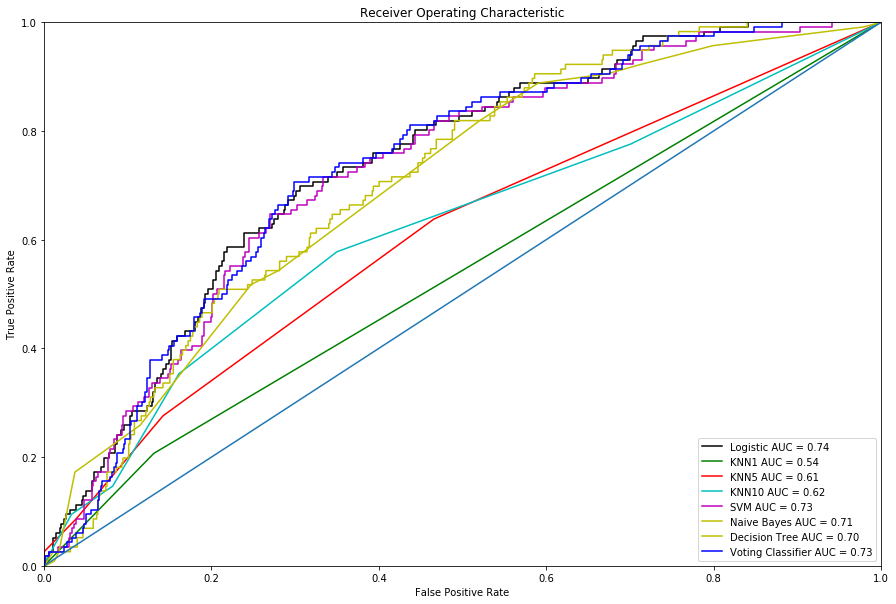

In [15]:
import sklearn.metrics as metrics

lg_probs = logistic_model.predict_proba(test_input)[:,1]
lg_fpr, lg_tpr, lg_threshold = metrics.roc_curve(test_label, lg_probs)
lg_auc = metrics.auc(lg_fpr, lg_tpr)

k1_probs = k1_model.predict_proba(test_input)[:,1]
k1_fpr, k1_tpr, k1_threshold = metrics.roc_curve(test_label, k1_probs)
k1_auc = metrics.auc(k1_fpr, k1_tpr)

k5_probs = k5_model.predict_proba(test_input)[:,1]
k5_fpr, k5_tpr, k5_threshold = metrics.roc_curve(test_label, k5_probs)
k5_auc = metrics.auc(k5_fpr, k5_tpr)

k10_probs = k10_model.predict_proba(test_input)[:,1]
k10_fpr, k10_tpr, k10_threshold = metrics.roc_curve(test_label, k10_probs)
k10_auc = metrics.auc(k10_fpr, k10_tpr)

svm_probs = svm_model.predict_proba(test_input)[:,1]
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(test_label, svm_probs)
svm_auc = metrics.auc(svm_fpr, svm_tpr)

nb_probs = nb_model.predict_proba(test_input)[:,1]
nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(test_label, nb_probs)
nb_auc = metrics.auc(nb_fpr, nb_tpr)

DTC_probs = DTC_model.predict_proba(test_input)[:,1]
DTC_fpr, DTC_tpr, DTC_threshold = metrics.roc_curve(test_label, DTC_probs)
DTC_auc = metrics.auc(DTC_fpr, DTC_tpr)

vc_probs = vc_model.predict_proba(test_input)[:,1]
vc_fpr, vc_tpr, vc_threshold = metrics.roc_curve(test_label, vc_probs)
vc_auc = metrics.auc(vc_fpr, vc_tpr)

mplt.figure(figsize=(15, 10))
mplt.title('Receiver Operating Characteristic')
mplt.plot(lg_fpr, lg_tpr, 'k', label = 'Logistic AUC = %0.2f' % lg_auc)
mplt.plot(k1_fpr, k1_tpr, 'g', label = 'KNN1 AUC = %0.2f' % k1_auc)
mplt.plot(k5_fpr, k5_tpr, 'r', label = 'KNN5 AUC = %0.2f' % k5_auc)
mplt.plot(k10_fpr, k10_tpr, 'c', label = 'KNN10 AUC = %0.2f' % k10_auc)
mplt.plot(svm_fpr, svm_tpr, 'm', label = 'SVM AUC = %0.2f' % svm_auc)
mplt.plot(nb_fpr, nb_tpr, 'y', label = 'Naive Bayes AUC = %0.2f' % nb_auc)
mplt.plot(DTC_fpr, DTC_tpr, 'y', label = 'Decision Tree AUC = %0.2f' % DTC_auc)
mplt.plot(vc_fpr, vc_tpr, 'b', label = 'Voting Classifier AUC = %0.2f' % vc_auc)
mplt.legend(loc = 'lower right')
mplt.plot([0, 1], [0, 1],'-')
mplt.xlim([0, 1])
mplt.ylim([0, 1])
mplt.ylabel('True Positive Rate')
mplt.xlabel('False Positive Rate')
#mplt.savefig('roccurveOnData.png')
mplt.show()

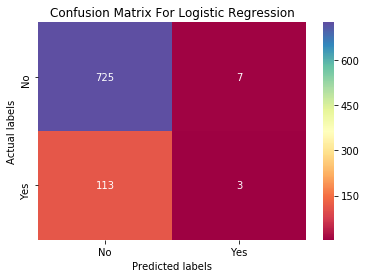

In [34]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(lg_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Logistic Regression')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataLG.png')

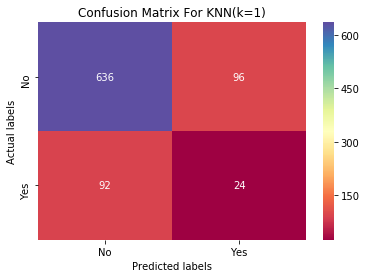

In [35]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k1_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=1)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataK1.png')

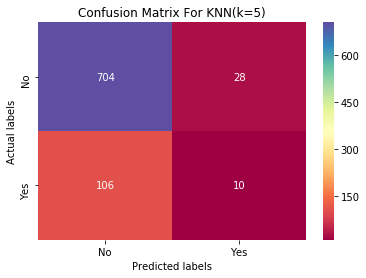

In [36]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k5_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=5)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataK5.png')

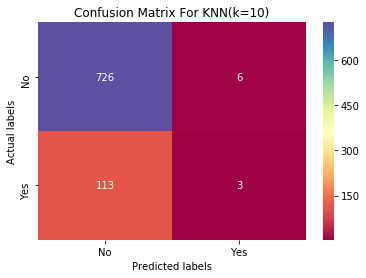

In [37]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k10_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=10)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataK10.png')

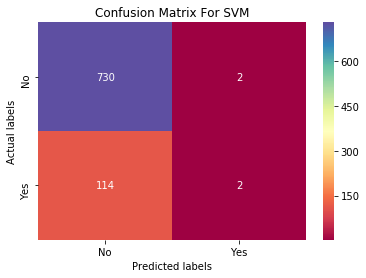

In [38]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(svm_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For SVM')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataSVM.png')

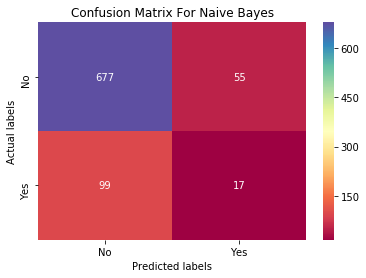

In [39]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(nb_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Naive Bayes')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataNB.png')

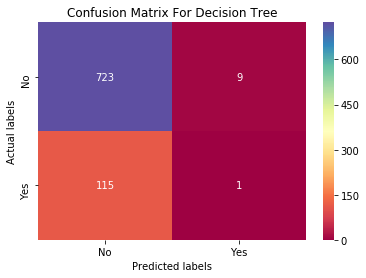

In [40]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(DTC_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Decision Tree')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataDTC.png')

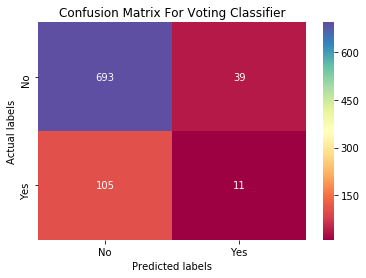

In [41]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(vc_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Voting Classifier')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelsOnDataVC.png')

In [42]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("DTCmodelsOnData.png")

C:\Users\ventr\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


True